In [6]:
import matplotlib.pyplot as plt
import math
import numpy as np
import copy
import numpy

# Модульное ДЗ 1
Вариант 2: В var2 представлена статистика по террористической угрозе в аэропортах за разные годы: год, количество различных видов оружия, обнаруженных сотрудниками, количество взрывов и ложных тревог.

# Задание 1
Для начала представим данные в удобной форме:

In [3]:
# для каждой характеристики создается список ее значений, функция возвращает списки всех характеристик
def get_data():
    f=open('var2.tsv', 'r')
    data = np.array([])
    k=0
    for line in f:
        list = line.split()
        data = np.append(data, list)
    f.close()
    data.shape = (25, 8)
    screened = []
    total = []
    handguns = []
    longguns = []
    fires = []
    explosives = []
    falseinfo = []

    for i in range(1,len(data)):
        screened.append(float(data[i][1]))

    for i in range(1, len(data)):
        total.append(int(data[i][2]))

    for i in range(1, len(data)):
        handguns.append(int(data[i][3]))

    for i in range(1, len(data)):
        longguns.append(int(data[i][4]))

    for i in range(1, len(data)):
        fires.append(int(data[i][5]))

    for i in range(1, len(data)):
        if data[i][6] == 'NA':
            continue
        explosives.append(int(data[i][6]))

    for i in range(1, len(data)):
        falseinfo.append(int(data[i][7]))

    return fires, screened, total, handguns, longguns, falseinfo, explosives    

Теперь рассмотрим графики функций распределения для каждой характеристики. Для этого был написан нижеприведенный код. Так как размах значений параметров может довольно сильно отличаться, отобразили функции распределения на нескольких графиках.

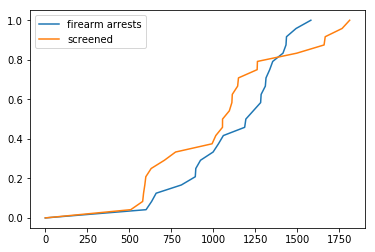

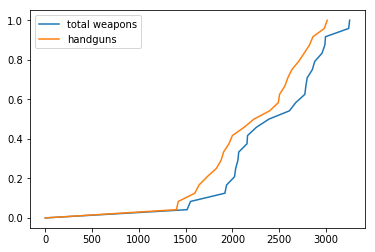

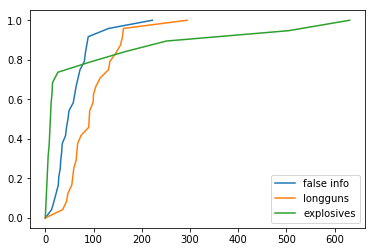

In [8]:
# считает эмпирическое распределниея по набору значений характеристики, возвращает список значений и их индексов
def dist(a):
    sample = copy.copy(a)
    sample.sort()
    length = len(sample)
    freq = [1 for i in range(len(sample))]
    for i in range(len(sample)):
        for j in range(len(sample)):
            if i == j:
                continue
            if sample[i] == sample[j]:
                freq[i] += 1

    vals = []
    freq_uni = []
    vals.append(0)
    freq_uni.append(0)
    for i in range(len(sample)):
        if sample[i] not in vals:
            vals.append(sample[i])
            freq_uni.append(freq[i])

    dist = [0 for i in range(len(freq_uni))]
    c = 0
    for i in range(len(freq_uni)):
        c += freq_uni[i]/length
        dist[i] = c


    return vals, dist

# По всем спискам характеристик отображает графики функций распределения
def view_dists(fires, screened, total, handguns, longguns, falseinfo, explosives):
    v6, d6 = dist(fires)
    plt.plot(v6, d6, label = "firearm arrests")
    v2, d2 = dist(screened)
    plt.plot(v2, d2, label = "screened")
    plt.legend()
    plt.show()

    v3, d3 = dist(total)
    plt.plot(v3, d3, label = "total weapons")
    v4, d4 = dist(handguns)
    plt.plot(v4, d4, label = "handguns")
    plt.legend()
    plt.show()

    v1, d1 = dist(falseinfo)
    plt.plot(v1, d1, label = "false info")
    v5, d5 = dist(longguns)
    plt.plot(v5, d5, label = "longguns")
    v7, d7 = dist(explosives)
    plt.plot(v7, d7, label = "explosives")
    plt.legend()
    plt.show()
    
fires, screened, total, handguns, longguns, falseinfo, explosives = get_data()
view_dists(fires, screened, total, handguns, longguns, falseinfo, explosives)

Чтобы сделать какие-либо выводы о связи характеристик рассмотрим значения коэффициента корреляции для всех пар характеристик. Наиболее интересные случаи представляют значения, близкие к 1, 0 и -1, так как именно такие значения свидетельствуют о линейной зависимости или о независимости. Выведем на экран именно такие интересующие нас значения.

In [19]:
# функция считает корреляцию между двумя характеристиками
def corr(a, b):
    if len(a) != len(b):
        return
    a_n = 0
    b_n = 0
    for i in a:
        a_n += i
    for i in b:
        b_n += i

    a_n /= len(a)
    b_n /= len(b)

    up = 0
    down1 = 0
    down2 = 0
    for i in range(len(a)):
        up += (a[i] - a_n)*(b[i] - b_n)
        down1 += (a[i] - a_n)**2
        down2 += (b[i] - b_n)**2


    down = math.sqrt(down1*down2)
    return up/down

print("positive correlation:\ntotal weapons and firearm arrests: ", corr(total, fires), "\ntotal weapons and handguns: ", corr(total, handguns), "\nfirearm arrests and handguns: ", corr(fires, handguns))
print("\nno correlation:\ntotal weapons and false info: ", corr(total, falseinfo),"\ntotal weapons and explosives: ", corr([total[i] for i in range(len(explosives))], explosives),"\nfirearm arrests and false info: ", corr(fires, falseinfo), "\nfalse info and handguns: ", corr(falseinfo, handguns))

positive correlation:
total weapons and firearm arrests:  0.9356714616631063 
total weapons and handguns:  0.9824380431970341 
firearm arrests and handguns:  0.93549595962786

no correlation:
total weapons and false info:  0.00444765842634842 
total weapons and explosives:  0.03846586244040167 
firearm arrests and false info:  0.09347339780387902 
false info and handguns:  -0.004381785998402853


Корреляцию между общим количеством оружия можно объяснить тем, что большую часть оружия в целом составляют пистолеты, поэтому корреляция между арестами и пистолетами можно в целом свести к корреляции между общим количеством оружия и пистолетами.

Интересно отметить отсутствие статистической связи в данной выборке между значениями общего количества оружия и ложных тревог и значениями общего количества оружия и взрывов. Так как общее количество оружия коррелирует с арестами, то логично, что знаечния аресты не коррелируют со значениями ложных тревог. Аналогично с отсутсвием корреляции между значениями ложных тревог и пистолетов.

# Задание 2
Пусть x1, . . . , xn — равномерно распределены на [0; θ] и θn = 2x.
Продемонстрируйте, что оценка является несмещенной.
Исследуйте дисперсию ˆθn. Выполняется ли неравенство Рао-Крамера?

Чтобы показать, что оценка является несмещенной, будем генерировать выборку равномерного распределения на отрезке от 0 до θ с разным размером n выборки, для каждого n считая собоственную оценку параметра. На графике отрисуем получиашиеся эмпирические значения оценки параметра для разного размера выборки и также отрисуем само значение оцениваемого параметра (в этом случае график будет прямой):  

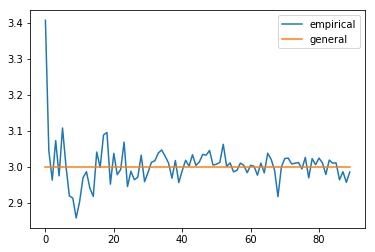

In [41]:
# функция считает оценку параметра theta по заданной выборке
def countEn(sample):
    res = 0
    for i in range(len(sample)):
        res += sample[i]

    res /= len(sample)
    return 2*res

#  функция генерирует выборку равномерного распределения разного размера, для каждого размера считает оценку параметры
#  и рисует эмпирические и генеральные значения
def view_estimate(theta=1):
    X = []
    for i in range(10, 9000, 100):
        sample = np.random.uniform(0,theta, (1, i))[0]
        X.append(countEn(sample))
    inds = [i for i in range(len(X))]
    plt.plot(inds, X, label='empirical')
    plt.plot([i for i in range(len(X))], [theta for i in range(len(X))], label='general')
    plt.legend()
    plt.show()
    
view_estimate(3)

Видим, что эмпирические значения сосредоточены вокруг генерального значения и несильно откланяются, поэтому можно считать данную оценку несмещенной.

Для исследования дисперсии оценки построим ее график, где размер выборки будет увеличиваться, и увидим, что значение дисперсии оценки параметра θ сходится к нулю. Расчет дисперсии:
$$D\bar\theta_{n}=D2\bar{x}=\frac{4}{n^2}D\sum_{1}^{n}x_{i}=\frac{4}{n^2}nDx_{1}=\frac{4}{n}\frac{\theta^{2}}{12}=\frac{\theta^2}{3n}$$
Также сразу будем считать значения I(θ), где I - информация Фишера, чтобы отобразить график значений правой части неравенства Рао-Крамера:
$$D\bar\theta_{n} >= \frac{1}{nI(\theta)}$$

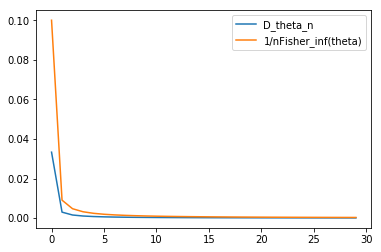

In [33]:
# функция считает дисперсию оценки параметра theta
def get_D_theta_n(theta=1, size=10):
    sample = np.random.uniform(0, theta, (1, size))[0]
    vals, inds = dist(sample)
    return (theta**2)/3/size

# функция рисует график левой и правой части неравенства Фишера
def view_rao_cramer():
    vars = []
    vals = []
    for i in range(10,3000,100):
        theta = 1
        vals.append(theta/i)
        vars.append(get_D_theta_n(theta=theta, size=i))

    inds = [i for i in range(len(vars))]
    plt.plot(inds, vars, label = 'D_theta_n')
    plt.plot(inds, vals, label = '1/nFisher_inf(theta)')
    plt.legend()
    plt.show()
    
view_rao_cramer()

Видим, что голубой график, соответствующий левой части неравенства Рао-Крамера, принимает меньшие значения, чем соответствующие значения правой части неравенства, поэтому нер-во Рао-Крамера в данном случае не выполняется.

# Задание 4
Продемонстрируйте, что значение выборочной функции распределения F_n(x) в точке x является несмещенной и состоятельной оценкой для теоретической функции распределения F(x) в той же точке. Исследуйте асимптотическое поведение дисперсии этой оценки.

Чтобы продемонстрировать несмещенность оценки, будем считать значение эмпирической функции распределения (э.ф.р.) в заданной точке х для разных значений размера выборки, отобразим на графике какие значения принимает эмпирическая функция в точке х и ф.р. равномерного распределения в точке х (в этом случае график - прямая)

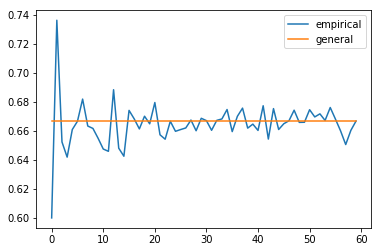

In [35]:
# функция генерирует выборку ранвомерного распределениея на отрезке [0, theta] размера size 
# и считает знаечния эмпирической функции в точке x
def Fx_n(theta=1, size=10, x=0.5):
    sample = np.random.uniform(0,theta, (1, size))[0]
    vals, inds = dist(sample)

    n = 0
    for i in range(len(sample)):
        if sample[i]< x:
            n += 1

    return n/size

# функция строит график значений эмпирической функции в точке х для разного размера выборки
# и отображает знаечние ф.р. равномерного распределения в точке х
def view_Fx_n(theta, x):
    X = []
    for i in range(10,6000,100):
        X.append(Fx_n(theta=theta, size=i, x=x))
    inds = [i for i in range(len(X))]
    plt.plot(inds, X, label='empirical')
    plt.plot([i for i in range(len(X))], [x/theta for i in range(len(X))], label='general')
    plt.legend()
    plt.show()

view_Fx_n(3, 2)

Видим, что значения э.ф.р. сосредоточены вокруг значения генеральной ф.р. и несильно от нее отклоняются, поэтому можно утверждать, что данная оценка несмещенная.

Теперь покажем состоятельность оценки. Последовательность значений э.ф.р. в точке х можно считать последовательностью случайных величин, тогда э.ф.р. в точке х будет состоятельной оценкой ф.р. в точке х, если:
$$F_{n}(x) \rightarrow F(x)$$
т.е. если $$P(|F_{n}(x)-F(x)| < \epsilon) \overset{p}{\rightarrow} 1$$ при  $$n \rightarrow \inf$$
Покажем сходимость на графике:

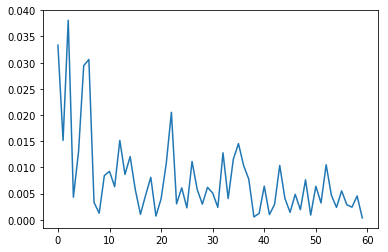

In [37]:
# функция считает модуль разницы между э.ф.р. и генеральной ф.р. в точке х для разных значений размера выборки
def check_est(theta, x):
    general = x/theta
    X = []
    for i in range(10,6000,100):
        X.append(abs(general-Fx_n(theta=theta, size=i, x=x)))
    inds = [i for i in range(len(X))]
    plt.plot(inds, X, label='empirical')
    plt.show()

check_est(3, 2)

По графику видно, что разница э.ф.р. и ф.р. в точке х сходится к нулю при увеличении размера выборки, значит оценка состоятельна.